## Visualisasi Ideal Filter

### Lowpass Filter

Fungsi dari lowpass filter adalah untuk meneruskan komponen sinusiodal dari frekuensi yang lebih rendah dari batas frekuensi yang direncanakan ($<f_c$). Filter ini akan menghentikan komponen sinusiodal yang lebih tinggi dari batas yang direncanakan ($>f_c$).

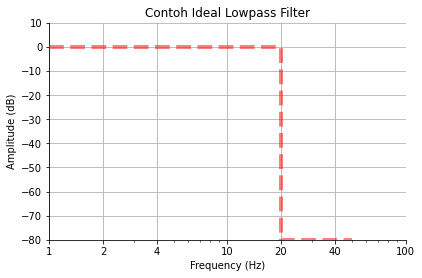

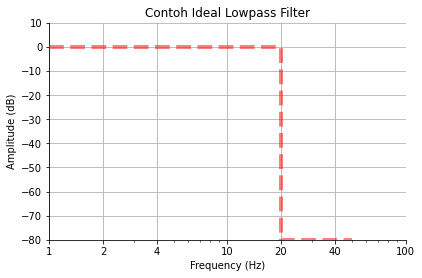

In [19]:
# Lowpass filter
from mne.viz import plot_ideal_filter

freq = [0, 20, 20, 50]
gain = [1, 1, 0, 0]
plot_ideal_filter(freq, gain, flim=(1, 100), title='Contoh Ideal Lowpass Filter')

### Highpass Filter

Fungsi dari highpass filter adalah untuk meneruskan komponen sinusiodal dari frekuensi yang lebih tinggi dari batas frekuensi yang direncanakan ($>f_c$). Filter ini akan menghentikan komponen sinusiodal yang lebih rendah dari batas yang direncanakan ($<f_c$).

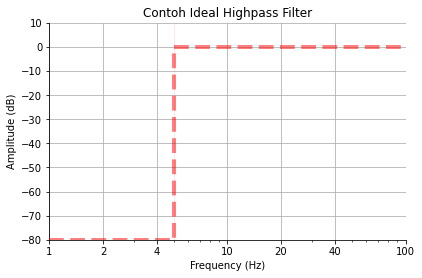

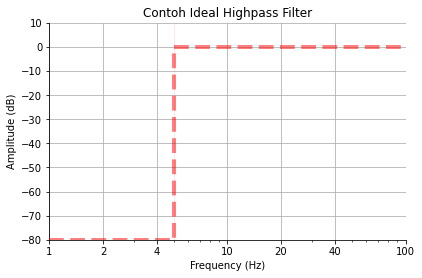

In [28]:
# Highpass filter
from mne.viz import plot_ideal_filter

freq = [0, 5, 5, 100]
gain = [0, 0, 1, 1]
plot_ideal_filter(freq, gain, flim=(1, 100), title='Contoh Ideal Highpass Filter')

### Bandpass Filter

Bandpass filter akan meneruskan komponen sinusiodal pada rentang frekuensi yang telah direncanakan ($f_1 < f_c < f_2$). Selanjutnya, semua komponen sinusiodal yang berada diluar rentang yang direncanakan, baik $<f_1$ ataupun $>f_2$ akan dihentikan

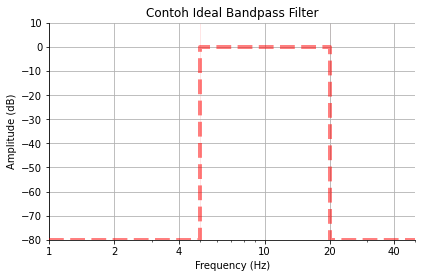

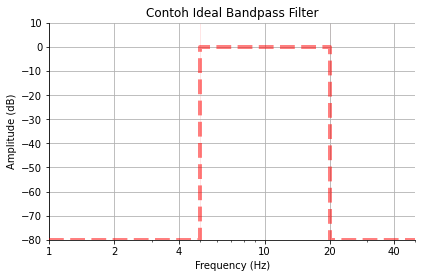

In [48]:
# Bandpass filter
from mne.viz import plot_ideal_filter

freq = [0, 5, 5, 20, 20, 50]
gain = [0, 0, 1, 1, 0, 0]
plot_ideal_filter(freq, gain, flim=(1, 50), title='Contoh Ideal Bandpass Filter')

### Bandstop Filter

Bandstop filter merupakan kebalikan dari BFP. Komponen sinusiodal yang berada pada rentang frekuensi yang direncanakan akan dihentikan, sedangkan yang berada diluar rentang frekuensi yang ditentukan akan diteruskan.

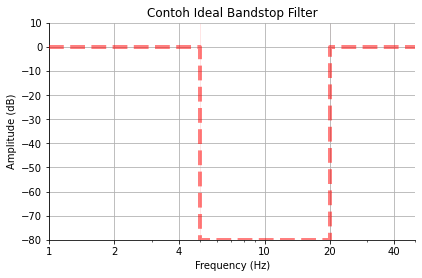

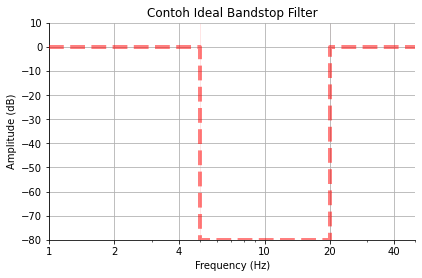

In [49]:
# Bandstop filter
from mne.viz import plot_ideal_filter

freq = [0, 5, 5, 20, 20, 50]
gain = [1, 1, 0, 0, 1, 1]
plot_ideal_filter(freq, gain, flim=(1, 50), title='Contoh Ideal Bandstop Filter')

## Demo Orde Filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import copy

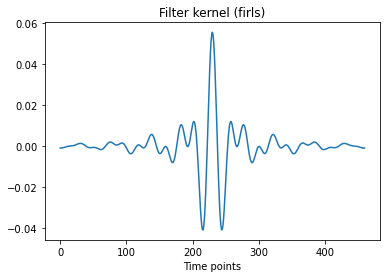

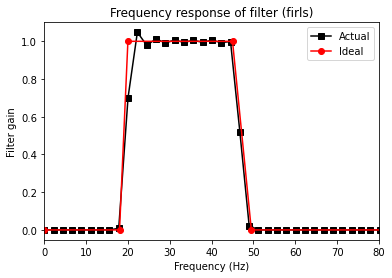

In [2]:
# filter parameters
srate   = 1024 # hz
nyquist = srate/2
frange  = [20,45]
transw  = .1
order   = int( 9*srate/frange[0] )

# order must be odd
if order%2==0:
    order += 1

# define filter shape
shape = [ 0, 0, 1, 1, 0, 0 ] # gain
frex  = [ 0, frange[0]-frange[0]*transw, frange[0], frange[1], frange[1]+frange[1]*transw, nyquist ] # freq



# filter kernel
filtkern = signal.firls(order,frex,shape,fs=srate)


# time-domain filter kernel
plt.plot(filtkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firls)')
plt.show()


# compute the power spectrum of the filter kernel
# Transform it to freq domain via FFT
filtpow = np.abs(scipy.fft.fft(filtkern))**2

# compute the frequencies vector and remove negative frequencies
hz      = np.linspace(0,srate/2,int(np.floor(len(filtkern)/2)+1))
filtpow = filtpow[0:len(hz)]


# plot amplitude spectrum of the filter kernel
plt.plot(hz,filtpow,'ks-',label='Actual')
plt.plot(frex,shape,'ro-',label='Ideal')
plt.xlim([0,frange[0]*4])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firls)')
plt.show()

In [16]:
def plot_order(N=5):
    # filter parameters
    srate   = 1024 # hz
    nyquist = srate/2
    frange  = [20,45]
    transw  = .1
    order   = int( N*srate/frange[0] )

    # order must be odd
    if order%2==0:
        order += 1

    # define filter shape
    shape = [ 0, 0, 1, 1, 0, 0 ] # gain
    frex  = [ 0, frange[0]-frange[0]*transw, frange[0], frange[1], frange[1]+frange[1]*transw, nyquist ] # freq



    # filter kernel
    filtkern = signal.firls(order,frex,shape,fs=srate)


    # time-domain filter kernel
    plt.plot(filtkern)
    plt.xlabel('Time points')
    plt.title('Filter kernel (firls)')
    plt.show()


    # compute the power spectrum of the filter kernel
    # Transform it to freq domain via FFT
    filtpow = np.abs(scipy.fft.fft(filtkern))**2

    # compute the frequencies vector and remove negative frequencies
    hz      = np.linspace(0,srate/2,int(np.floor(len(filtkern)/2)+1))
    filtpow = filtpow[0:len(hz)]


    # plot amplitude spectrum of the filter kernel
    plt.plot(hz,filtpow,'ks-',label='Actual')
    plt.plot(frex,shape,'ro-',label='Ideal')
    plt.xlim([0,frange[0]*4])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Filter gain')
    plt.legend()
    plt.title('Frequency response of filter (firls)')
    # plt.show()

In [17]:
from ipywidgets import interact
interact(plot_order, N=range(1,31))

interactive(children=(Dropdown(description='N', index=4, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

<function __main__.plot_order(N=5)>